In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
import pylab
import plotly as py

# Описание датасета.
## Датасет содержит информацию о публичных школах Бостона за учебный год 2018-2019. Обновлен в Сентябре 2018 года. Можно найти на https://www.kaggle.com/crawford/boston-public-schools
## В таблице находится описание столбцов.
|X|Y|OBJECTID_1|OBJECTID|BLDG_ID|BLDG_NAME|ADDRESS|CITY|ZIPCODE|CSP_SCH_ID|SCH_ID|SCH_NAME|SCH_LABEL|SCH_TYPE|SHARED|COMPLEX|POINT_X|POINT_Y|
|------------------|-----------------|---------------------------------------|----|---------|---------------|----------|-----|---------------|--------------|--------|--------------|----------------------|---------|-----------------------------------------------|--------------------------|-------------------------------------------------|---------------------------------------------------|
|Долгота координаты|Широта координаты|Ключ, элементы которого идет по порядку|Ключ|Id здания|Название здания|Адрес|Город|Почтовый индекс|Id школы в CSP|Id школы|Название школы|Краткое название школы|Тип школы|Принимает значение shared или пустую строку|Комплекс учебных заведений|Долгота после преобразования в проекцию Меркатора|Широта после преобразования в проекцию Меркатора|

# Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий (либо если такой датасет вам найти сложно, придётся разные датасеты для разных пунктов задания использовать)

In [2]:
data = pd.read_csv('Public_Schools.csv', index_col = 'OBJECTID_1')

In [37]:
data.head()

,X,Y,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,SCH_ID,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,POINT_X,POINT_Y
OBJECTID_1,,,,,,,,,,,,,,,,,
1,-71.004121,42.388799,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,,,790128.152748,2.967094e+06
2,-71.030480,42.378545,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,,,783027.745829,2.963318e+06
3,-71.033891,42.375279,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,,,782112.823908,2.962122e+06
4,-71.038011,42.378089,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,4543,O'Donnell Elementary,O'Donnell,ES,,,780994.000003,2.963140e+06
5,-71.034921,42.380957,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,1070,East Boston High,East Boston HS,HS,,,781823.000004,2.964190e+06


# Matplotlib

## Построить любой график (любого рода) с помощью чистого matplotlib / pylab
### Построим график, который показывает зависимость широты после преобразования в проекцию Меркатора от id.
### Школы распологаются в одном городе. Поэтому разброс широты мал и равен 0.034808.

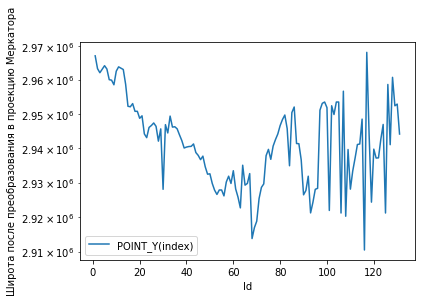

In [4]:
plt.plot(data.index, data.POINT_Y, label = 'POINT_Y(index)')
plt.xlabel('Id')
plt.ylabel('Широта после преобразования в проекцию Меркатора')
plt.legend()
plt.yscale('log')

## Построить несколько суб-графиков на одном графике используя .subplot.
### Построим график с 2 подграфиками. 1 подграфик показывает зависимость широты от index. 2 подграфик показывает зависимость долготы от index. Разброс широты и долготы примерно одинаков.

Text(0.5, 1.0, 'X(index)')

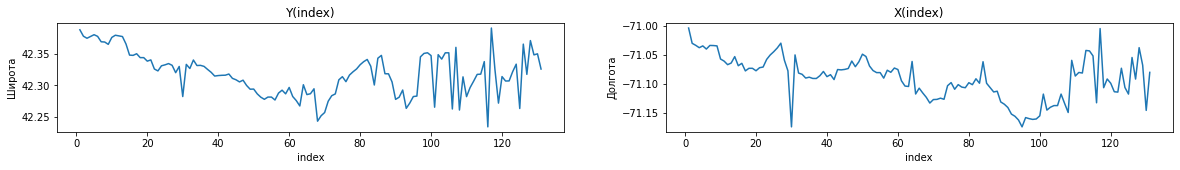

In [5]:
plt.figure(figsize = (20, 2))
plt.subplot(1, 2, 1)
plt.plot(data.index, data.Y)
plt.xlabel('index')
plt.ylabel('Широта')
plt.title('Y(index)')
plt.subplot(1, 2, 2)
plt.plot(data.index, data.X)
plt.xlabel('index')
plt.ylabel('Долгота')
plt.title('X(index)')

# На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть хоба варианта нужно продемонстрировать.

### Построим график для колонок широты и долготы, преобразованные в проекцию Меркатора от id. Значения практически одинаковы, так как школы расположены рядом.

Text(0, 0.5, 'Долгота(Меркатор), Широта(Меркатор)')

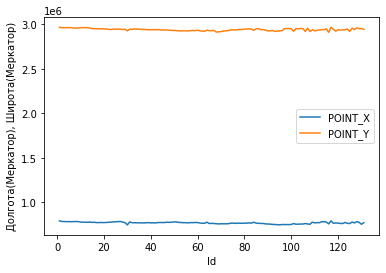

In [6]:
graph = data[['POINT_X', 'POINT_Y']].plot()
graph.set_xlabel('Id')
graph.set_ylabel('Долгота(Меркатор), Широта(Меркатор)')

### Построим box график для долготы и покажем зависимость колонки от города. В Boston и  Dorchester большой разброс по долготе. В Allston, Charlestown, East Boston разброс меньше, чем у других городов.

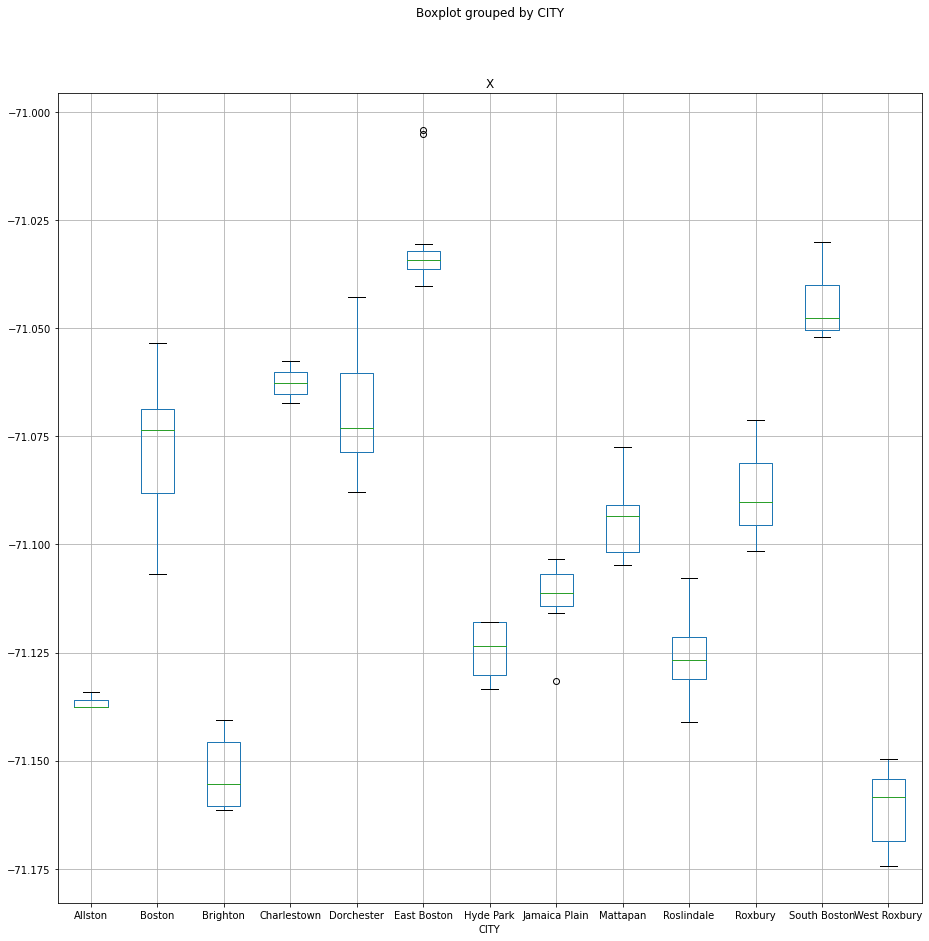

In [7]:
data.boxplot(column = 'X', by = 'CITY', figsize = (15, 15))

### Построим гистограмму для широты. Распределение похоже на нормальное. Скорее всего это из-за того, что в центре города больше школ, чем на окраине города.

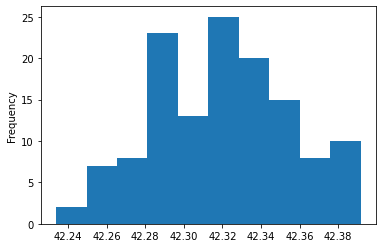

In [8]:
data.Y.plot.hist()

# Seaborn

## Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

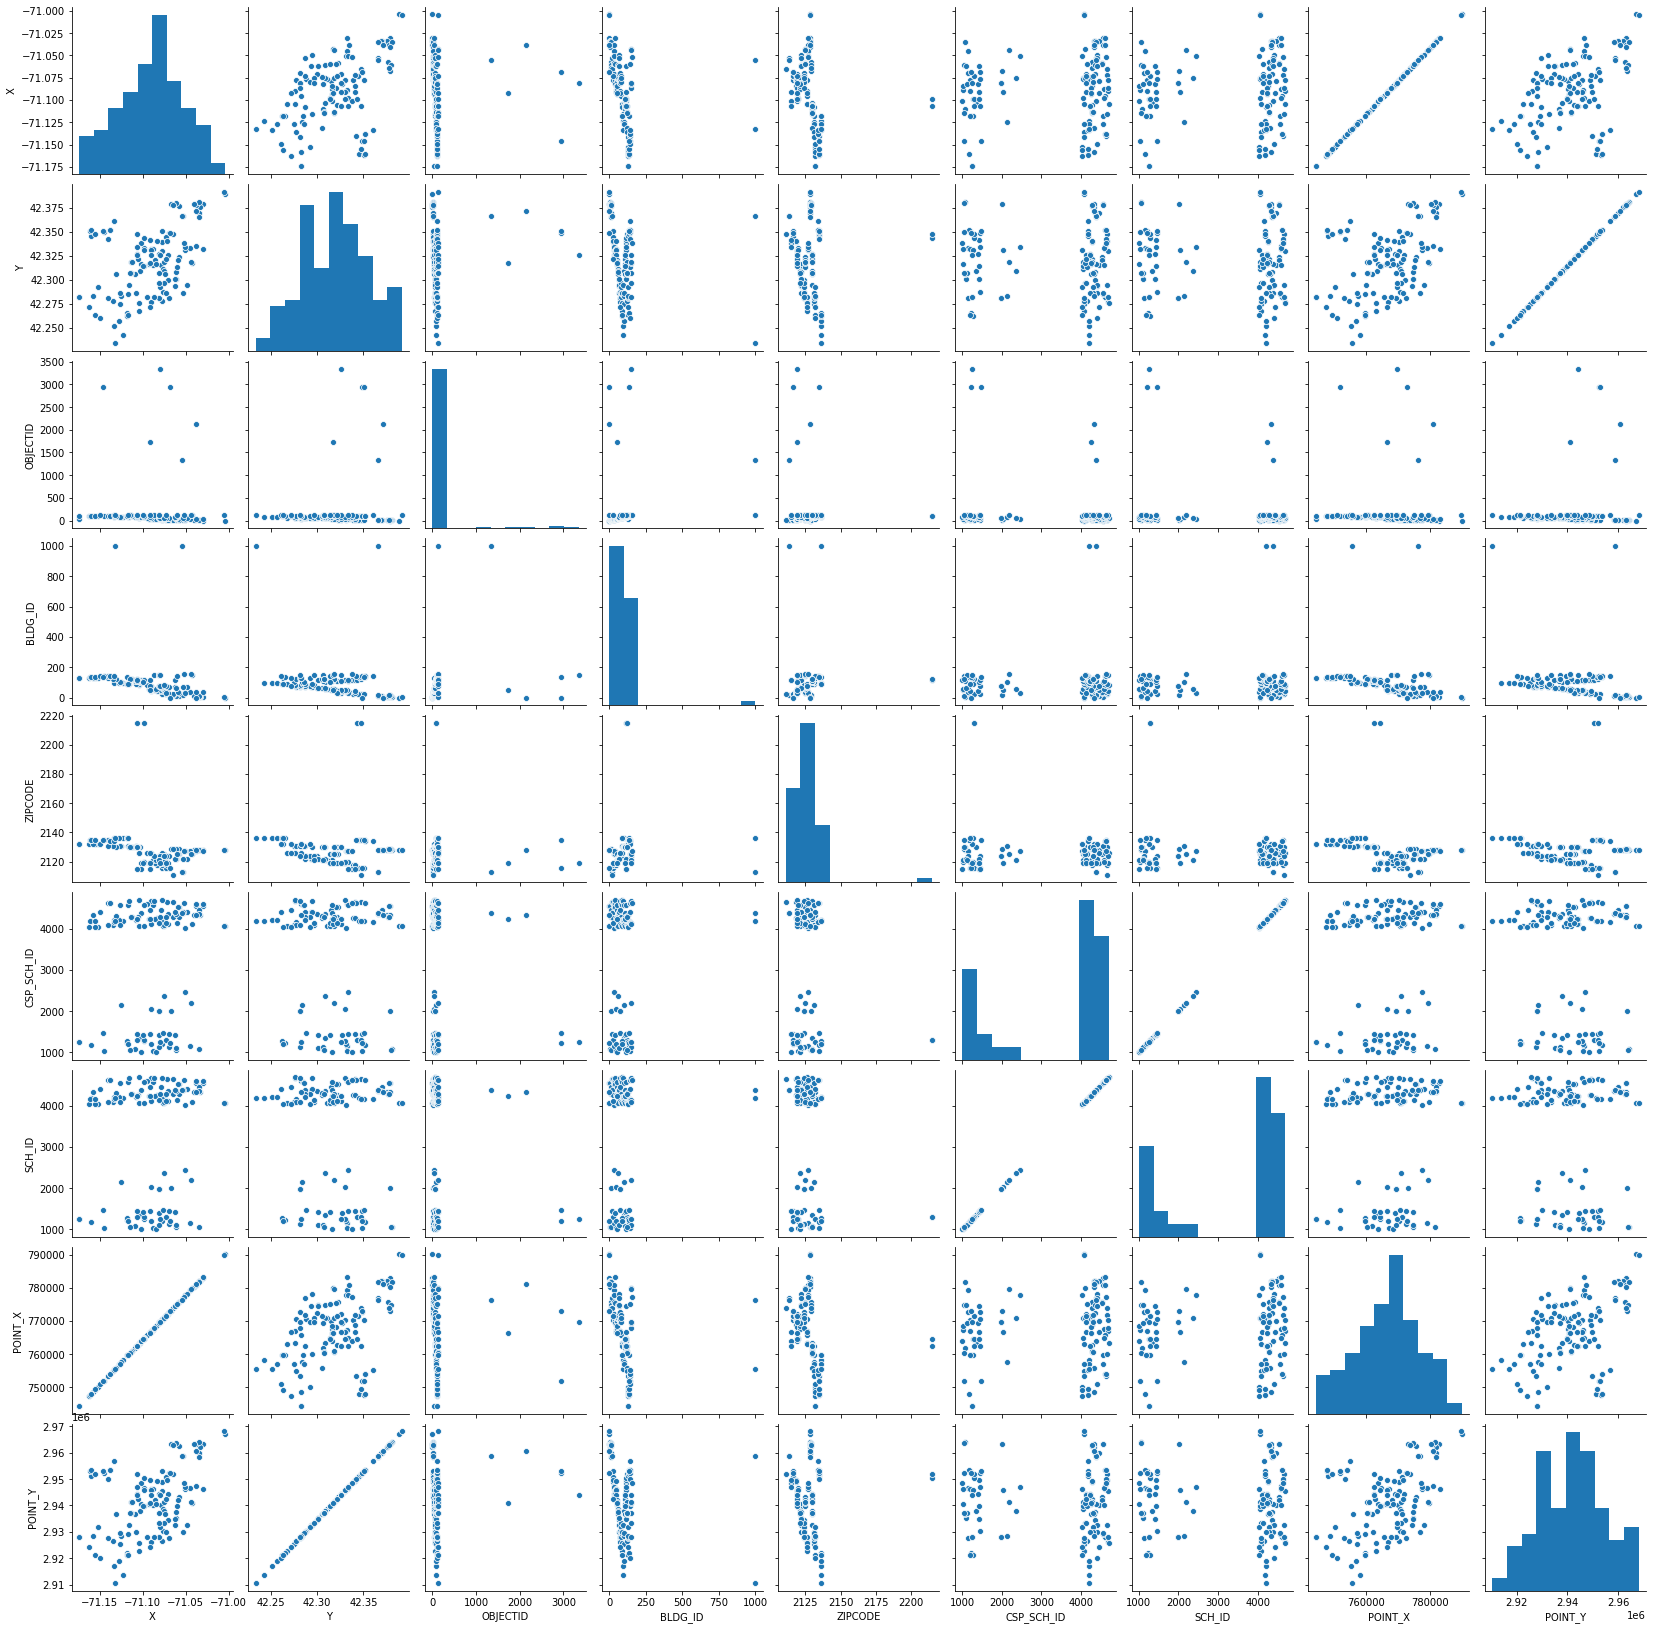

In [9]:
sns.pairplot(data)

## Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

### Построим график для широты и долготы. График показывает расположение школ на карте. Большая часть школ находится в центре. Также есть небольшие области на окраине. 

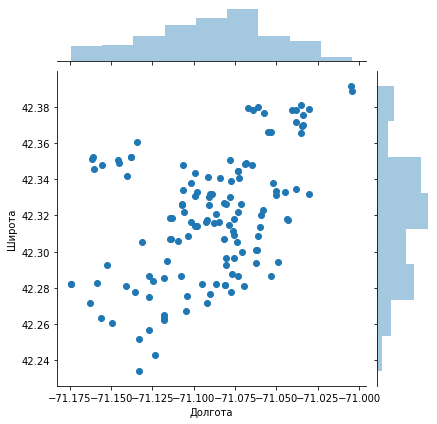

In [10]:
graph = sns.jointplot(data.X, data.Y)
graph.set_axis_labels('Долгота', 'Широта')

## Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального
### Построим boxplot для Долготы и Города. В Boston, Dorchester школы сильно разбросны по долготе.

[Text(0, 0.5, 'Город'), Text(0.5, 0, 'Долгота')]

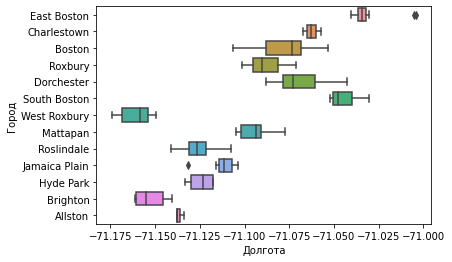

In [11]:
graph = sns.boxplot(data.X, data.CITY)
graph.set(xlabel = 'Долгота', ylabel = 'Город')

## Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика!)
## Ожидаемо, что на диагонали корреляция будет большая. Также долгота и широта и преобразованные в проекции Меркатора имеют сильную корреляцию. Менее всего коррелированы долгота с id здания и почтовым индексом. Широта и долгота имеют среднюю корреляцию в сравнении с остальными колонками. Остальные колонки имеют корреляцию почти равную 0.

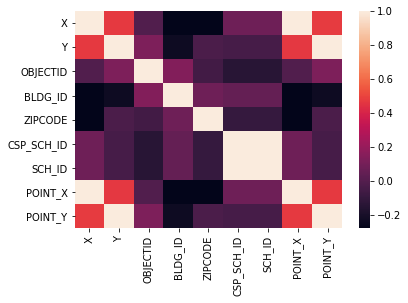

In [12]:
c = data.select_dtypes(['number']).corr()
sns.heatmap(c)

## Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению
### Построим QQ-график для колонки с долготой.
### Распределение школ по долготе очень похоже на нормальное распределение.

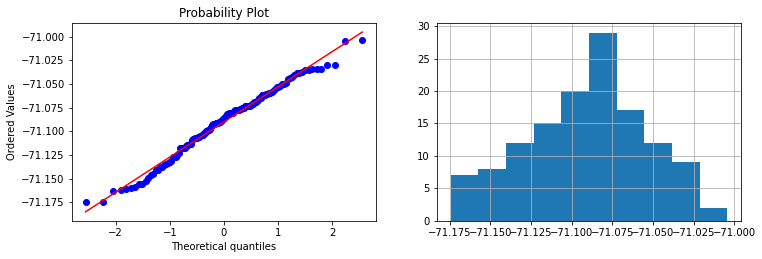

In [14]:
pylab.figure(figsize = (12, 8))
pylab.subplot(2, 2, 1)
stats.probplot(data.X, dist = 'norm', plot = pylab)
pylab.subplot(2, 2, 2)
data.X.hist()

## Построить любой график (связанный с вашими данными!) с помощью plotly
### Построим гистограмму, которая показывает количество школ в городе. Больше всего школ в городе Dorchester, меньше всего в городе Allston.

In [53]:
y = data.groupby('CITY').count()
g_o = [py.graph_objs.Bar(x = y.index, y = y.X)]
py.offline.iplot(g_o)